# Perkenalan

## Objective
Objective yang ingin dicapat pada analisis ini, yaitu:
- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan



## Import Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Data Loading

In [41]:
# Read data from CSV file into a Pandas DataFrame
df = pd.read_csv('dataset/CC GENERAL.csv')

# Display information about the DataFrame (columns, data types, non-null counts, etc.)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Exploratory data analysis

In [42]:
# Display the first few rows of the DataFrame to get an initial look at the data
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [43]:
# showing columns
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [44]:
# show cols and rows count
df.shape

(8950, 18)

In [45]:
# Count missing value
missing_count = df.isna().sum()

missing_count

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [69]:
# Fill missing values in 'MINIMUM_PAYMENTS' with the mean of the column
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

# Fill missing values in 'CREDIT_LIMIT' with the mean of the column
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

# Count the number of missing values in each column after the imputation
missing_count = df.isna().sum()


In [70]:
# Display the data types of each column in the DataFrame
df.dtypes


CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [71]:
# Generate descriptive statistics for the numerical columns in the DataFrame
df.describe()


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.612411   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2330.588021          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        335.628312          0.000000    12.000000  
75%     1901.134317        864.206542          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

## Correlation Matrix

In [72]:
# Select and create a new DataFrame with only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Display the new DataFrame containing numerical columns
numerical_df


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        864.206542          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        864.206542          0.000000       6  
8947    81

In [50]:
# function to plot a correlation matrix for the DataFrame.
def plot_corr(df, size=15):
    corr = df.corr()
    plt.figure(figsize=(size, size))
    plt.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()

<Figure size 1500x1500 with 0 Axes>

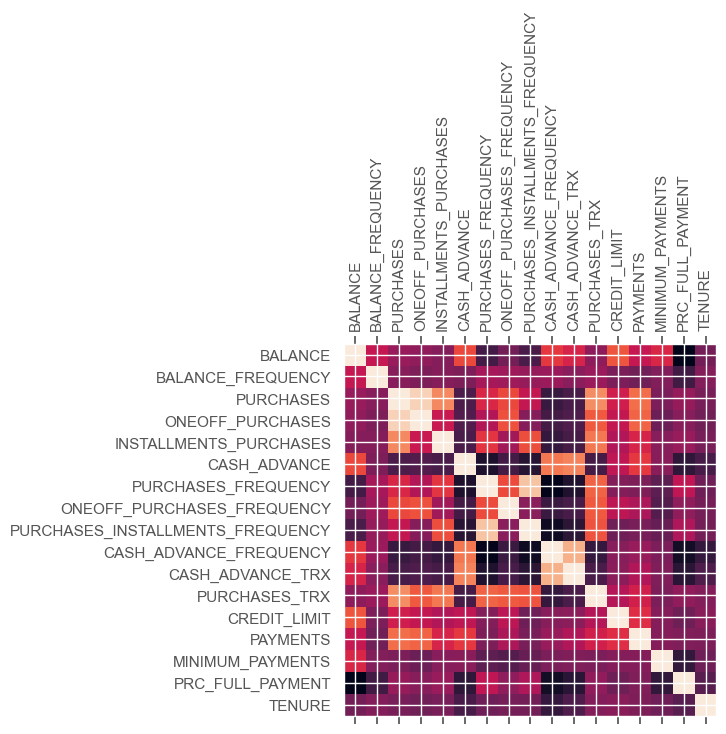

In [73]:
# Plot the correlation matrix for the numerical columns in the DataFrame
plot_corr(numerical_df)


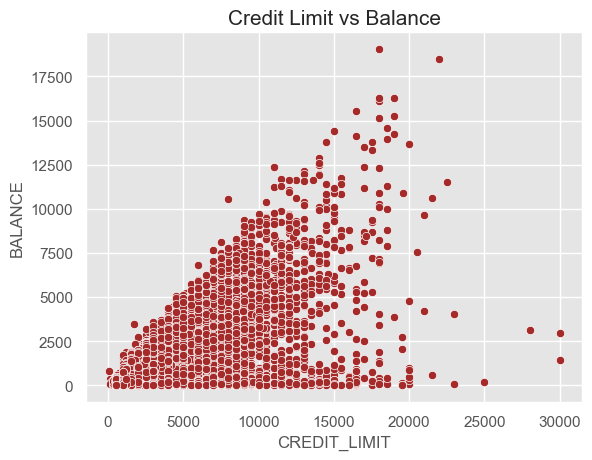

In [74]:
# Create a scatter plot of 'CREDIT_LIMIT' against 'BALANCE'
sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=df, color='brown')

# Set the title of the plot
plt.title("Credit Limit vs Balance", fontsize=15)

# Display the plot
plt.show()


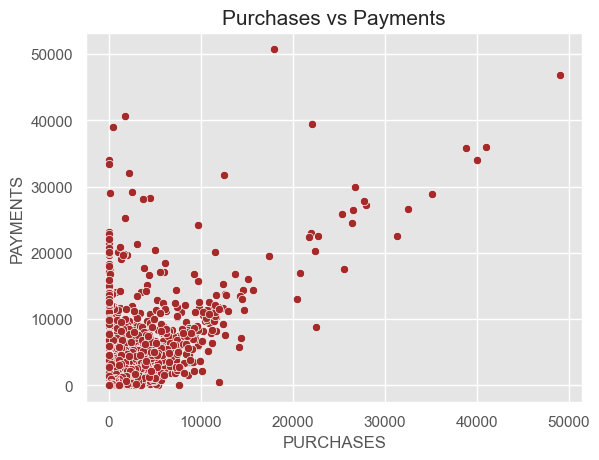

In [75]:
# Create a scatter plot of 'PURCHASES' against 'PAYMENTS'
sns.scatterplot(x='PURCHASES', y='PAYMENTS', data=df, color='brown')

# Set the title of the plot
plt.title("Purchases vs Payments", fontsize=15)

# Display the plot
plt.show()


In [76]:
# Import the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the numerical data using the StandardScaler
data_scaled = scaler.fit_transform(numerical_df)

# Display descriptive statistics of the scaled data
pd.DataFrame(data_scaled).describe()


0             1             2             3             4   \
count  8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03   
mean  -2.540488e-17  1.587805e-16  3.175610e-18 -6.033659e-17  3.175610e-17   
std    1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00   
min   -7.516398e-01 -3.703271e+00 -4.695519e-01 -3.569340e-01 -4.545762e-01   
25%   -6.900078e-01  4.904486e-02 -4.510006e-01 -3.569340e-01 -4.545762e-01   
50%   -3.320286e-01  5.180838e-01 -3.004541e-01 -3.340396e-01 -3.561562e-01   
75%    2.352559e-01  5.180838e-01  5.004652e-02 -9.056763e-03  6.366321e-02   
max    8.397489e+00  5.180838e-01  2.248351e+01  2.420107e+01  2.442689e+01   

                 5             6             7             8             9   \
count  8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03   
mean  -6.351220e-18  9.328354e-17  1.905366e-17  5.716098e-17 -1.595744e-16   
std    1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00   
min   -4.667856e-01 -1.221758e+00 -6.786608e-01 -9.169952e-01 -6.753489e-01   
25%   -4.667856e-01 -1.014125e+00 -6.786608e-01 -9.169952e-01 -6.753489e-01   
50%   -4.667856e-01  2.404259e-02 -3.993193e-01 -4.976286e-01 -6.753489e-01   
75%    6.435242e-02  1.062211e+00  3.269728e-01  9.701506e-01  4.351492e-01   
max    2.201112e+01  1.269843e+00  2.673451e+00  1.599199e+00  6.820521e+00   

                 10            11            12            13            14  \
count  8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03   
mean  -1.746585e-17 -1.905366e-17  2.032390e-16 -2.540488e-17  2.699268e-17   
std    1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00   
min   -4.760698e-01 -5.917959e-01 -1.221536e+00 -5.986883e-01 -3.708230e-01   
25%   -4.760698e-01 -5.515646e-01 -7.955261e-01 -4.662913e-01 -2.975162e-01   
50%   -4.760698e-01 -3.101767e-01 -4.107426e-01 -3.026846e-01 -2.268130e-01   
75%    1.100739e-01  9.213645e-02  5.512163e-01  5.802976e-02  4.878305e-17   
max    1.754785e+01  1.381101e+01  7.010083e+00  1.692228e+01  3.241509e+01   

                 15            16  
count  8.950000e+03  8.950000e+03  
mean  -9.526830e-18  2.921561e-16  
std    1.000056e+00  1.000056e+00  
min   -5.255510e-01 -4.122768e+00  
25%   -5.255510e-01  3.606795e-01  
50%   -5.255510e-01  3.606795e-01  
75%   -3.712234e-02  3.606795e-01  
max    2.893453e+00  3.606795e-01

In [77]:
# Import the KMeans algorithm from sklearn
from sklearn.cluster import KMeans

# Create a KMeans object with 2 clusters and 'k-means++' initialization
kmeans = KMeans(n_clusters=2, init='k-means++')

# Fit the KMeans model to the scaled data
kmeans.fit(data_scaled)


C:\Users\Aspire 5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [78]:
# Get the inertia (sum of squared distances to the nearest cluster center) from the KMeans model
kmeans.inertia_


127785.069963095

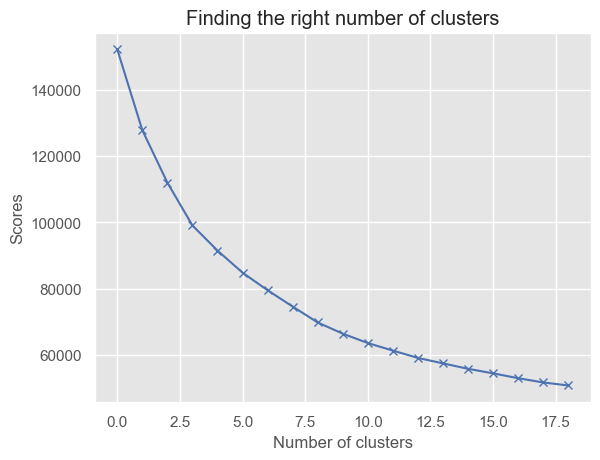

In [79]:
# Initialize an empty list to store the sum of squared errors (SSE) for different numbers of clusters
SSE = []

# Iterate through a range of cluster numbers (1 to 19)
for i in range(1, 20):
    # Create a KMeans model with the current number of clusters and fit it to the scaled data
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    
    # Append the inertia (SSE) to the list
    SSE.append(kmeans.inertia_)

# Plot the SSE values against the number of clusters
plt.plot(SSE, 'bx-')
plt.style.use('ggplot')
plt.title('Finding the right number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Scores') 
plt.show()


In [80]:
# Create a KMeans model with 6 clusters and 'k-means++' initialization
kmeans = KMeans(n_clusters=6, init='k-means++')

# Fit the KMeans model to the scaled data
kmeans.fit(data_scaled)

# Get the cluster assignments for each data point
pred = kmeans.predict(data_scaled)


C:\Users\Aspire 5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [81]:
# Print the cluster assignments for each data point
print("Predictions:", pred)

# Print the inertia (sum of squared distances to the nearest cluster center) from the KMeans model
print("Inertia:", kmeans.inertia_)

Predictions: [1 5 4 ... 3 1 1]
Inertia: 84852.45265384733


In [82]:
# Create a DataFrame with the scaled data and the cluster assignments
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred

# Display the counts of data points in each cluster
cluster_counts = frame['cluster'].value_counts()
cluster_counts

cluster
1    3038
3    2226
4    1321
0    1311
5     968
2      86
Name: count, dtype: int64